In [1]:
import pandas as pd
import os

archivos = {
    "2015": "../data/raw/2015.csv",
    "2016": "../data/raw/2016.csv",
    "2017": "../data/raw/2017.csv",
    "2018": "../data/raw/2018.csv",
    "2019": "../data/raw/2019.csv"
}

COLUMN_MAPS = {
    "2015": {"Country": "country", "Happiness Score": "happiness_score", "Economy (GDP per Capita)": "gdp_per_capita", "Family": "social_support", "Health (Life Expectancy)": "healthy_life_expectancy", "Freedom": "freedom_to_make_life_choices", "Generosity": "generosity", "Trust (Government Corruption)": "perceptions_of_corruption"},
    "2016": {"Country": "country", "Happiness Score": "happiness_score", "Economy (GDP per Capita)": "gdp_per_capita", "Family": "social_support", "Health (Life Expectancy)": "healthy_life_expectancy", "Freedom": "freedom_to_make_life_choices", "Generosity": "generosity", "Trust (Government Corruption)": "perceptions_of_corruption"},
    "2017": {"Country": "country", "Happiness.Score": "happiness_score", "Economy..GDP.per.Capita.": "gdp_per_capita", "Family": "social_support", "Health..Life.Expectancy.": "healthy_life_expectancy", "Freedom": "freedom_to_make_life_choices", "Generosity": "generosity", "Trust..Government.Corruption.": "perceptions_of_corruption"},
    "2018": {"Country or region": "country", "Score": "happiness_score", "GDP per capita": "gdp_per_capita", "Social support": "social_support", "Healthy life expectancy": "healthy_life_expectancy", "Freedom to make life choices": "freedom_to_make_life_choices", "Generosity": "generosity", "Perceptions of corruption": "perceptions_of_corruption"},
    "2019": {"Country or region": "country", "Score": "happiness_score", "GDP per capita": "gdp_per_capita", "Social support": "social_support", "Healthy life expectancy": "healthy_life_expectancy", "Freedom to make life choices": "freedom_to_make_life_choices", "Generosity": "generosity", "Perceptions of corruption": "perceptions_of_corruption"}
}

FINAL_COLUMNS = [
    'country',
    'happiness_score',
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption',
    'year'
]

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataframes = []
for año, archivo in archivos.items():
    df = pd.read_csv(archivo)
    df = df.rename(columns=COLUMN_MAPS[año])
    df['year'] = int(año)
    df = df.reindex(columns=FINAL_COLUMNS)
    dataframes.append(df)
df_all = pd.concat(dataframes, ignore_index=True)
df_all = df_all.dropna()
df_all.to_csv("../data/processed/happiness_ready.csv", index=False)

In [4]:
df_all.head(), df_all.shape
df_all.describe()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
count,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000,781.000000
mean,5.377232,0.914537,1.078780,0.612342,0.411254,0.218618,0.125436,2016.992318
std,1.127071,0.405403,0.329581,0.248459,0.152911,0.122394,0.105816,1.417814
min,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,4.509000,0.605000,0.870210,0.440060,0.310480,0.130000,0.054000,2016.000000
50%,5.321000,0.982000,1.125000,0.647239,0.431000,0.202000,0.091000,2017.000000
75%,6.182000,1.233748,1.328000,0.808000,0.531000,0.279060,0.156030,2018.000000
max,7.769000,1.870766,1.644000,1.141000,0.724000,0.838075,0.551910,2019.000000


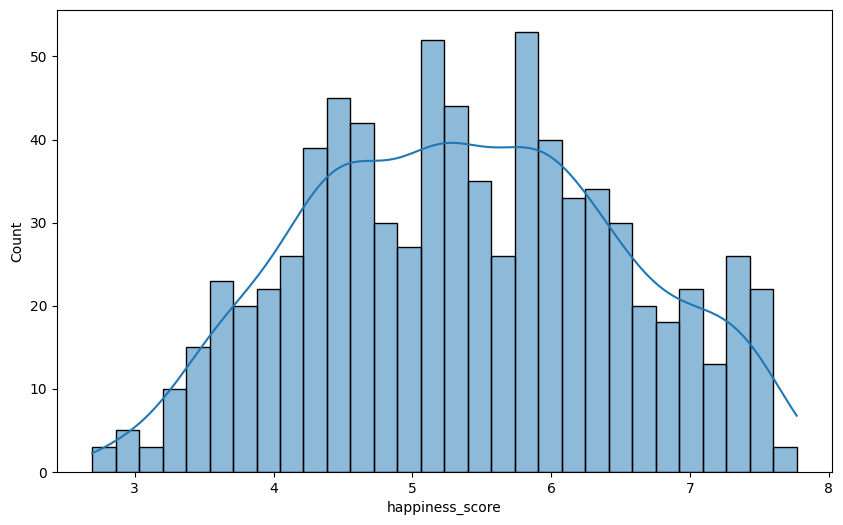

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df_all['happiness_score'], kde=True, bins=30)
plt.show()

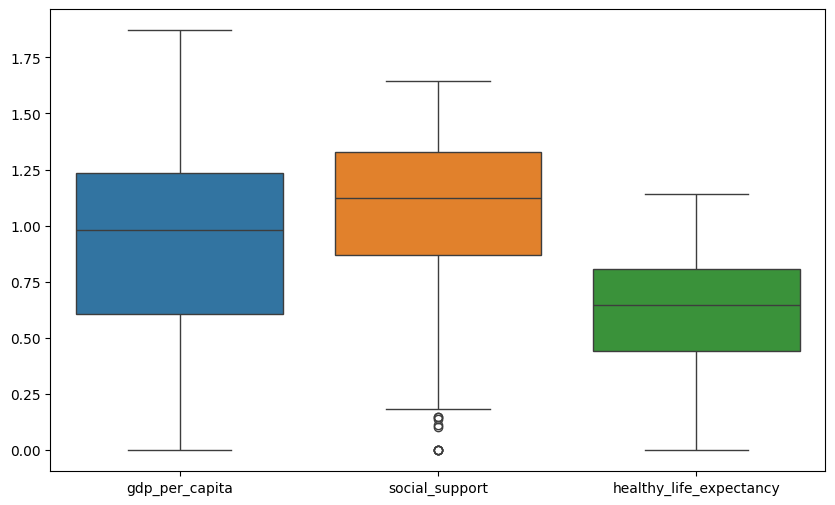

In [6]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_all[['gdp_per_capita','social_support','healthy_life_expectancy']])
plt.show()

In [7]:
features = [
    'gdp_per_capita',
    'social_support',
    'healthy_life_expectancy',
    'freedom_to_make_life_choices',
    'generosity',
    'perceptions_of_corruption'
]
X = df_all[features]
y = df_all['happiness_score']

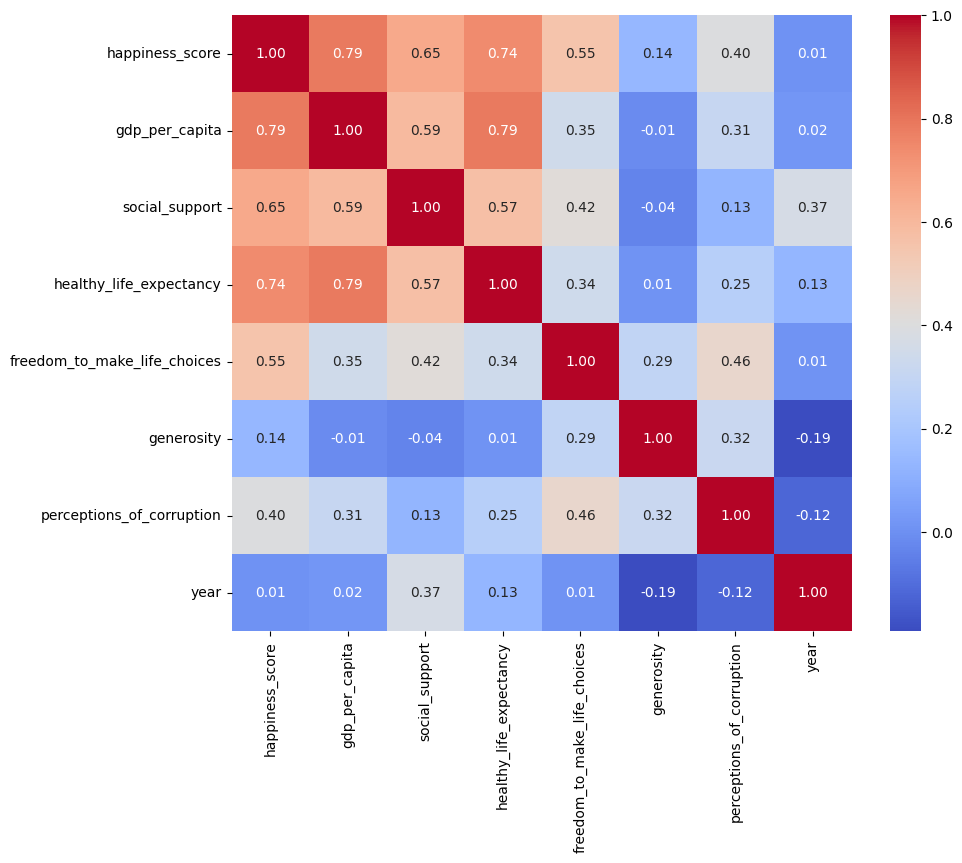

happiness_score                 1.000000
gdp_per_capita                  0.789719
healthy_life_expectancy         0.742843
social_support                  0.651246
freedom_to_make_life_choices    0.553365
perceptions_of_corruption       0.398418
generosity                      0.138142
year                            0.005946
Name: happiness_score, dtype: float64


In [8]:
corr_matrix = df_all.select_dtypes(include=['int64','float64']).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()
print(corr_matrix['happiness_score'].sort_values(ascending=False))

In [9]:
X = df_all[features]
y = df_all['happiness_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")

MAE: 0.432
MSE: 0.310
R²: 0.752


In [11]:
joblib.dump(model, '../model/modelo_regresion_felicidad.pkl')

['../model/modelo_regresion_felicidad.pkl']